La base de datos credit.csv contiene datos de clientes de un banco e información sobre su situación financiera. Las variables son las siguientes:

Income : Ingreso anual disponible en miles de dólares.

Limit : Límite del crédito.

Rating : Ranking del crédito.

Cards : Cantidad de tarjetas de credito.

Age : Edad del usuario.

Education : Años de educación del usuario.

Gender : ¿Hombre o mujer?

Student : ¿Es estudiante?

Married : ¿Está casado?

DebtLevel (Variable Respuesta) : El nivel de deuda es aceptable (0) o alto (1).

a) Cargue los datos y obtenga un resumen descriptivo de estos con el método describe().

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_credito =  pd.read_csv("credito.csv")

df_credito.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,DebtLevel
0,14.891,3606,283,2,34,11,Male,No,Yes,0
1,106.025,6645,483,3,82,15,Female,Yes,Yes,1
2,104.593,7075,514,4,71,11,Male,No,No,1
3,148.924,9504,681,3,36,11,Female,No,No,1
4,55.882,4897,357,2,68,16,Male,No,Yes,0


In [3]:
df_credito.describe()

,Income,Limit,Rating,Cards,Age,Education,DebtLevel
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,0.500000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,0.500626
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,0.000000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,0.500000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,1.000000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1.000000


In [4]:
df_credito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     400 non-null    float64
 1   Limit      400 non-null    int64  
 2   Rating     400 non-null    int64  
 3   Cards      400 non-null    int64  
 4   Age        400 non-null    int64  
 5   Education  400 non-null    int64  
 6   Gender     400 non-null    object 
 7   Student    400 non-null    object 
 8   Married    400 non-null    object 
 9   DebtLevel  400 non-null    int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 31.4+ KB


b) Determine qué variables de la base de datos corresponden a categorías.

In [5]:
variables_categoricas = df_credito.select_dtypes(include="object").columns.tolist()

print('Estas son las variables categoricas:',variables_categoricas)

Estas son las variables categoricas: ['Gender', 'Student', 'Married']


b.1) Defina los objetos df_num y df_cat donde estén solo los predictores numéricos y categóricos respectivamente. Guarde la variable DebtLevel en un objeto aparte.

In [6]:
df_num = df_credito[['Income','Limit','Rating','Cards','Age','Education']]

df_num.head()

,Income,Limit,Rating,Cards,Age,Education
0,14.891,3606,283,2,34,11
1,106.025,6645,483,3,82,15
2,104.593,7075,514,4,71,11
3,148.924,9504,681,3,36,11
4,55.882,4897,357,2,68,16


In [7]:
df_cat = df_credito[variables_categoricas]

df_cat.head()

,Gender,Student,Married
0,Male,No,Yes
1,Female,Yes,Yes
2,Male,No,No
3,Female,No,No
4,Male,No,Yes


In [8]:
df_DebtLevel = df_credito[['DebtLevel']]
df_DebtLevel.head()

,DebtLevel
0,0
1,1
2,1
3,1
4,0


b.2) Recodifique todas las variables categóricas. 

Para recodificar las variables categóricas, puede utilizar la clase OneHotEncoder de Scikit-Learn indicando los argumentos sparse=False y drop="first", ajuste esta con la base de datos de variables categóricas. 

Luego cree el objeto df_one_hot que es una nueva base de datos con las variables categóricas pero dummificadas.

In [9]:
from sklearn.preprocessing import OneHotEncoder

ohe= OneHotEncoder(sparse=False, drop="first")  #instanciamos el OneHot Encoder
ohe.fit(df_cat)
df_cat_one_hot = ohe.transform(df_cat)

df_one_hot = pd.DataFrame(df_cat_one_hot, columns=ohe.get_feature_names_out())


/Users/raimundoschulzehot/miniconda3/envs/diplomado/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [10]:
display(df_one_hot)

,Gender_Female,Student_Yes,Married_Yes
0,0.0,0.0,1.0
1,1.0,1.0,1.0
2,0.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
395,0.0,0.0,1.0
396,0.0,0.0,0.0
397,1.0,0.0,1.0
398,0.0,0.0,1.0


b.3) Realice un proceso similar para estandarizar las variables numéricas, guarde el resultado en el objeto df_num_std.

In [11]:
from sklearn.preprocessing import StandardScaler

escalador = StandardScaler()
escalador.fit(df_num)
df_num_st = escalador.transform(df_num)

df_num_std = pd.DataFrame(df_num_st, columns=escalador.get_feature_names_out())
df_num_std.head()




,Income,Limit,Rating,Cards,Age,Education
0,-0.861583,-0.489999,-0.465539,-0.699130,-1.257674,-0.784930
1,1.727437,0.828261,0.828703,0.031032,1.528451,0.496588
2,1.686756,1.014787,1.029311,0.761194,0.889964,-0.784930
3,2.946152,2.068440,2.110003,0.031032,-1.141586,-0.784930
4,0.302928,0.070012,0.013331,-0.699130,0.715831,0.816968


b.3) Concatene el objeto df_num con df_one_hot usando la función de pandas concat([df_num, df_one_hot], axis=1), de modo que en un objeto X se encuentren todas las variables (esto se conoce como feature matrix). Puede utilizar la función pd.concat() para esto, tal como se muestra a continuación.

In [12]:
df_credito_procesado= pd.concat([df_num_std, df_one_hot], axis=1)

df_credito_procesado.head()

,Income,Limit,Rating,Cards,Age,Education,Gender_Female,Student_Yes,Married_Yes
0,-0.861583,-0.489999,-0.465539,-0.699130,-1.257674,-0.784930,0.0,0.0,1.0
1,1.727437,0.828261,0.828703,0.031032,1.528451,0.496588,1.0,1.0,1.0
2,1.686756,1.014787,1.029311,0.761194,0.889964,-0.784930,0.0,0.0,0.0
3,2.946152,2.068440,2.110003,0.031032,-1.141586,-0.784930,1.0,0.0,0.0
4,0.302928,0.070012,0.013331,-0.699130,0.715831,0.816968,0.0,0.0,1.0


Defina sets de entrenamiento y testeo con un porcentaje de datos de entrenamiento del 75%.

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_credito_procesado, df_DebtLevel, test_size=0.25, random_state=2023)

d) Entrene un Support Vector Machine con kernel gaussiano (kernel="rbf") en los datos de entrenamiento. Obtenga el accuracy de validación cruzada con la estratregia de 5-Folds (recuerde que esto se lleva a cabo con la función cross_val_score, la clase KFold y con los datos de entrenamiento).

In [14]:
from sklearn.svm import SVC

svm = SVC(kernel="rbf", random_state=2023)
svm.fit(x_train, y_train)

y_pred= svm.predict(x_test)

/Users/raimundoschulzehot/miniconda3/envs/diplomado/lib/python3.9/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
from sklearn.metrics import get_scorer_names
print(get_scorer_names())

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'matthews_corrcoef', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_negative_likelihood_ratio', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'positive_likelihood_ratio', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weight

In [16]:
from sklearn.model_selection import KFold, cross_val_score

configuraciones = KFold(n_splits=5, shuffle=True, random_state=2023)
resultados = cross_val_score(
    estimator = svm,
    X         = x_train,
    y         = y_train,
    cv        = configuraciones,
    scoring   = "accuracy"
)
print("- Accuracy en cada grupo de validación cruzada:")
print(resultados.round(3))
print("\n- Accuracy en validación cruzada:", resultados.mean())

- Accuracy en cada grupo de validación cruzada:
[0.933 0.85  0.933 0.933 0.933]

- Accuracy en validación cruzada: 0.9166666666666667


/Users/raimundoschulzehot/miniconda3/envs/diplomado/lib/python3.9/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/raimundoschulzehot/miniconda3/envs/diplomado/lib/python3.9/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/raimundoschulzehot/miniconda3/envs/diplomado/lib/python3.9/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/raimundoschulzehot/miniconda3/envs/diplomado/lib/python3.9/site-packages/sklearn/uti

e) Mediante validación cruzada, encuentre el kernel y variables slack (esto se controla mediante el hiperparámetro C) que máximicen el F1. A continuación, se propone una grilla de valores posibles.

In [41]:
from sklearn.model_selection import GridSearchCV, KFold

hiperparametros = {"kernel": ["rbf", "linear", "poly"],
                "C":(-3, 1, 10)}

configuraciones = KFold(n_splits=10, shuffle=True, random_state=2023)
svm             = SVC(random_state=2023)

modelos = GridSearchCV(
    estimator  = svm,              # modelo a optimizar
    param_grid = hiperparametros,  # Hiperparámetros donde buscar
    cv         = configuraciones,  # configuraciones validación cruzada
    scoring    = "accuracy",       # Buscamos optimizar el accuracy
    n_jobs     = -1,               # Para usar todos los nucleos
    verbose    = 1                 # Para saber cuantos modelos estamos ajustando.
)
modelos.fit(x_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


/Users/raimundoschulzehot/miniconda3/envs/diplomado/lib/python3.9/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/raimundoschulzehot/miniconda3/envs/diplomado/lib/python3.9/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/raimundoschulzehot/miniconda3/envs/diplomado/lib/python3.9/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/raimundoschulzehot/miniconda3/envs/diplomado/lib/python3.9/site-packages/sklearn/uti

GridSearchCV(cv=KFold(n_splits=10, random_state=2023, shuffle=True),
             estimator=SVC(random_state=2023), n_jobs=-1,
             param_grid={'C': (-3, 1, 10), 'kernel': ['rbf', 'linear', 'poly']},
             scoring='accuracy', verbose=1)

In [42]:
modelos.best_params_

{'C': 10, 'kernel': 'linear'}

f) Con el mejor modelo, obtenga la matriz de confusión y reporte de clasificación en los datos de testeo. Comente comparativamente con los resultados anteriores ¿Hay evidencias de overfitting o underfitting?

In [43]:
#buscamos reporte de clasificaicon

from sklearn.metrics import classification_report


mejor_modelo = modelos.best_estimator_.fit(x_train, y_train)

y_pred_train = mejor_modelo.predict(x_train)
y_pred_test  = mejor_modelo.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        49
           1       0.98      0.98      0.98        51

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



/Users/raimundoschulzehot/miniconda3/envs/diplomado/lib/python3.9/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


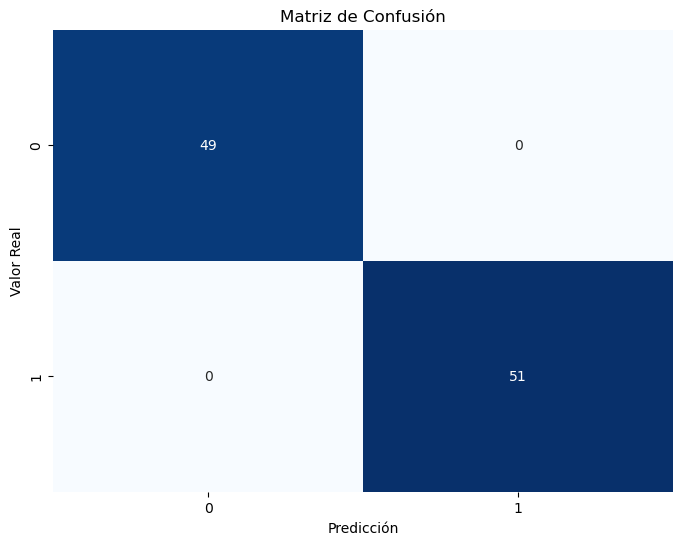

In [44]:
#buscamos matriz de confucion

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Obtén las predicciones del modelo en el conjunto de prueba
y_pred = modelos.predict(x_test)

# Calcula la matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)

# Imprime la matriz de confusión


plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()


In [40]:
##procedemos a revisar como estan los datos, si son underfittin o subfitting

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Calcular métricas en el conjunto de entrenamiento
train_accuracy = accuracy_score(y_train, y_pred_train)
train_precision = precision_score(y_train, y_pred_train)
train_recall = recall_score(y_train, y_pred_train)
train_f1 = f1_score(y_train, y_pred_train)

# Calcular métricas en el conjunto de prueba
test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test)
test_recall = recall_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test)

# Imprimir las métricas
print("Conjunto de entrenamiento:")
print("Accuracy:", train_accuracy)
print("Precision:", train_precision)
print("Recall:", train_recall)
print("F1-Score:", train_f1)

print("\nConjunto de prueba:")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1-Score:", test_f1)


Conjunto de entrenamiento:
Accuracy: 0.9766666666666667
Precision: 0.9671052631578947
Recall: 0.9865771812080537
F1-Score: 0.9767441860465117

Conjunto de prueba:
Accuracy: 0.98
Precision: 0.9803921568627451
Recall: 0.9803921568627451
F1-Score: 0.9803921568627451


Al Parecer tienen buena prediccion, ya que los valores estan centrados y no tienen por ajuste muy significativo.